# London Area Suitability Software

## Project Summary:

As London's population continues to grow, with a projected increase of 8.289% by 2035("https://www.macrotrends.net/global-metrics/cities/22860/london/population"), the challenge of finding suitable housing in an unfamiliar part of the city becomes increasingly daunting for many prospective movers. The decision-making process is relatively straightforward when looking for a new home close to one's current residence; however, relocating to a different part of town, moving across the country, or purchasing a second home presents a more complex set of challenges. Gaining a deep understanding of a new area to determine if it aligns with one’s living preferences requires time and effort, and important local nuances often go unnoticed during brief visits.

Furthermore, the UK's housing market is distinctly localized, making it crucial to meticulously research individual neighborhoods and streets to avoid costly mistakes. This need becomes even more pressing when quick decisions are required in competitive housing situations.

To address these challenges, I developed an Area Recommender tool. Utilizing [model], this tool analyzes [number] different features to streamline the process of finding an ideal area in London for buying or renting property. This solution significantly simplifies the search for a new home, allowing users to make informed decisions efficiently and confidently.

## Introduction

### Objective:

The primary objective of the Area Recommender tool is to simplify and accelerate the process of finding a suitable area in London to live, whether for renting or buying property. By leveraging advanced predictive modeling, the tool aims to provide personalized area recommendations that align with user preferences and requirements.

### Problem Statement:

As London’s population is projected to increase significantly by 2035, the demand for housing in areas unfamiliar to prospective residents is growing. Navigating the highly localized UK housing market and making quick, well-informed decisions is essential due to the competitive nature of real estate transactions. The challenge lies in efficiently gathering and analyzing extensive local information to avoid potential missteps in the housing search process.

### Stakeholders:

The primary stakeholders of this project include:

Prospective Homebuyers and Renters - Individuals or families looking for new homes either within different parts of London or from outside the city.

Real Estate Agents - Professionals who could use the tool to provide better recommendations to their clients, enhancing customer satisfaction and efficiency.

Property Developers - Firms that could benefit from understanding area preferences to better target their developments according to market demands.

Local Authorities - Government bodies interested in monitoring housing demand trends and planning resources accordingly.
By addressing the specific needs of these stakeholders, the Area Recommender tool enhances the decision-making process for all parties involved in the London housing market.

## Gathering Data

In order to create a dataset that displays statistics of what users are looking for when buing a house, I gathered 4 different dataset that showcases data of the London borough's profile. The datasets include information such as child's qualification status, crime rates, property prices, etc.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("London_borough.csv")
house_df = pd.read_csv("House_price_london.csv")
crime_df = pd.read_csv("London_Crime.csv")
areas = df['area']

In [7]:
df

,area,Poverty rate,Child poverty rate (AHC),Income deprivation (relative to London overall),80:20 ratio of earnings,"Main homelessness duty owed per 1,000 households","Households in temporary accommodation per 1,000","Repossessions per 1,000 households",Median rent as a percentage of median pay,"Average net affordable, social and discounted housing completions",People seen sleeping rough by outreach,Proportion of borough residents' jobs that are low paid,Unemployment rate,Unemployment rate 1 year change,Out-of-work benefits,19 year olds without level 3 qualifications,"Infant mortality rate per 1,000 live births","Deaths of <75 year olds per 100,000",Percentage of pupils who achieved grade 9-4,Proportion with no qualifications
0,Barking and Dagenham,29.0,42.0,1.90,2.05,0.66,16.08,4.11,36.5,613,139,24.6,6.8,1.9,16.7,34.7,4.6,433.0,66.0,12.0
1,Barnet,26.0,25.0,0.77,2.41,0.50,13.63,2.09,43.1,338,166,18.9,5.4,0.1,11.7,21.7,3.6,258.0,80.1,6.9
2,Bexley,26.0,26.0,0.70,2.29,0.48,5.68,2.76,33.2,284,92,16.7,4.9,2.2,10.4,37.3,6.0,308.0,69.4,7.4
3,Brent,32.0,36.0,1.11,2.42,0.52,13.97,3.45,43.1,1112,373,23.3,5.7,-1.3,14.9,28.0,4.1,305.0,68.0,7.6
4,Bromley,17.0,20.0,0.58,2.57,1.48,10.87,1.43,38.1,90,92,14.0,5.0,2.3,9.3,32.6,2.7,250.0,73.2,4.4
5,Camden,41.0,40.0,1.18,2.48,0.27,5.31,0.89,57.2,121,719,12.2,4.9,1.0,13.7,25.2,1.7,324.0,67.9,6.1
6,City of London,26.0,30.0,1.01,2.41,0.31,12.32,3.12,36.5,571,373,16.3,5.3,0.6,14.7,33.3,2.4,314.0,64.5,6.1
7,Croydon,34.0,32.0,1.00,2.33,1.01,20.41,3.51,44.1,774,563,19.8,4.9,-0.3,13.3,23.2,3.0,300.0,73.7,7.3
8,Ealing,33.0,31.0,1.49,2.35,0.70,23.49,3.53,37.3,240,219,22.8,5.6,-0.3,16.4,34.8,5.8,297.0,65.7,4.4
9,Enfield,21.0,36.0,1.26,2.49,1.46,13.91,3.75,48.9,382,196,14.2,4.4,-0.1,13.8,35.2,2.8,331.0,66.3,4.4


In [6]:
house_df

,area,average property price 2024 Feb
0,Barking and Dagenham,328226.0
1,Barnet,583647.0
2,Bexley,391250.0
3,Brent,521609.0
4,Bromley,505297.0
5,Camden,858206.0
6,City of London,808976.0
7,Croydon,394025.0
8,Ealing,533943.0
9,Enfield,425468.0


In [379]:
crime_df

,area,total crime,crime rates
0,Barking and Dagenham,20860,123
1,Barnet,28583,91
2,Bexley,16574,84
3,Brent,31822,114
4,Bromley,23740,88
5,Camden,41947,109
6,City of London,10499,29
7,Croydon,33730,109
8,Ealing,32044,105
9,Enfield,29588,106


In [380]:
df = df.sort_values(by=['area'], ascending=True)
house_df = house_df.sort_values(by = ['area'], ascending = True)
crime_df = crime_df.sort_values(by = ['area'], ascending = True)

In [381]:
df.set_index('area', inplace=True)
house_df.set_index('area', inplace=True)
crime_df.set_index('area', inplace=True)

In [382]:
df_merged = pd.concat([df, crime_df, house_df], axis=1)
df_merged

,Poverty rate,Child poverty rate (AHC),Income deprivation (relative to London overall),80:20 ratio of earnings,"Main homelessness duty owed per 1,000 households","Households in temporary accommodation per 1,000","Repossessions per 1,000 households",Median rent as a percentage of median pay,"Average net affordable, social and discounted housing completions",People seen sleeping rough by outreach,...,Unemployment rate 1 year change,Out-of-work benefits,19 year olds without level 3 qualifications,"Infant mortality rate per 1,000 live births","Deaths of <75 year olds per 100,000",Percentage of pupils who achieved grade 9-4,Proportion with no qualifications,total crime,crime rates,average property price 2024 Feb
area,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,29.0,42.0,1.90,2.05,0.66,16.08,4.11,36.5,613,139,...,1.9,16.7,34.7,4.6,433.0,66.0,12.0,20860,123,328226.0
Barnet,26.0,25.0,0.77,2.41,0.50,13.63,2.09,43.1,338,166,...,0.1,11.7,21.7,3.6,258.0,80.1,6.9,28583,91,583647.0
Bexley,26.0,26.0,0.70,2.29,0.48,5.68,2.76,33.2,284,92,...,2.2,10.4,37.3,6.0,308.0,69.4,7.4,16574,84,391250.0
Brent,32.0,36.0,1.11,2.42,0.52,13.97,3.45,43.1,1112,373,...,-1.3,14.9,28.0,4.1,305.0,68.0,7.6,31822,114,521609.0
Bromley,17.0,20.0,0.58,2.57,1.48,10.87,1.43,38.1,90,92,...,2.3,9.3,32.6,2.7,250.0,73.2,4.4,23740,88,505297.0
Camden,41.0,40.0,1.18,2.48,0.27,5.31,0.89,57.2,121,719,...,1.0,13.7,25.2,1.7,324.0,67.9,6.1,41947,109,858206.0
City of London,26.0,30.0,1.01,2.41,0.31,12.32,3.12,36.5,571,373,...,0.6,14.7,33.3,2.4,314.0,64.5,6.1,10499,29,808976.0
Croydon,34.0,32.0,1.00,2.33,1.01,20.41,3.51,44.1,774,563,...,-0.3,13.3,23.2,3.0,300.0,73.7,7.3,33730,109,394025.0
Ealing,33.0,31.0,1.49,2.35,0.70,23.49,3.53,37.3,240,219,...,-0.3,16.4,34.8,5.8,297.0,65.7,4.4,32044,105,533943.0


In [383]:
df_merged.rename(columns={
    'Poverty rate': 'poverty_rate',
    'Child poverty rate (AHC)': 'child_poverty_rate',
    'Income deprivation (relative to London overall)': 'income_deprivation_score',
    '80:20 ratio of earnings': 'earnings_ratio_80_to_20',
    'Main homelessness duty owed per 1,000 households': 'homelessness_rate',
    'Households in temporary accommodation per 1,000': 'households_temp_accommodation',
    'Repossessions per 1,000 households': 'repossessions_per_1000',
    'Median rent as a percentage of median pay': 'rent_to_income_ratio',
    'Average net affordable, social and discounted housing completions': 'housing_completions',
    'People seen sleeping rough by outreach': 'rough_sleepers_count',
    'Proportion of borough residents\' jobs that are low paid': 'low_paid_jobs_proportion',
    'Unemployment rate': 'unemployment_rate',
    'Unemployment rate 1 year change': 'unemployment_rate_change',
    'Out-of-work benefits': 'out_of_work_benefits',
    '19 year olds without level 3 qualifications': 'no_level_3_qualifications_19',
    'Infant mortality rate per 1,000 live births': 'infant_mortality_rate',
    'Deaths of <75 year olds per 100,000': 'early_death_rate',
    'Percentage of pupils who achieved grade 9-4': 'pupils_intelligence',
    'Proportion with no qualifications': 'no_qualifications_proportion',
    'total crime': 'total_crime',
    'crime rates': 'crime_rates',
    'average property price 2024 Feb' : 'average_house_price'
}, inplace=True)

print(df_merged.columns)


Index(['poverty_rate', 'child_poverty_rate', 'income_deprivation_score',
       'earnings_ratio_80_to_20', 'homelessness_rate',
       'households_temp_accommodation', 'repossessions_per_1000',
       'rent_to_income_ratio', 'housing_completions', 'rough_sleepers_count',
       'low_paid_jobs_proportion', 'unemployment_rate',
       'unemployment_rate_change', 'out_of_work_benefits',
       'no_level_3_qualifications_19', 'infant_mortality_rate',
       'early_death_rate', 'pupils_intelligence',
       'no_qualifications_proportion', 'total_crime', 'crime_rates',
       'average_house_price'],
      dtype='object')


In [384]:
df_merged.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

,poverty_rate,child_poverty_rate,income_deprivation_score,earnings_ratio_80_to_20,homelessness_rate,households_temp_accommodation,repossessions_per_1000,rent_to_income_ratio,housing_completions,rough_sleepers_count,low_paid_jobs_proportion,unemployment_rate,unemployment_rate_change,out_of_work_benefits,no_level_3_qualifications_19,infant_mortality_rate,early_death_rate,pupils_intelligence,no_qualifications_proportion,total_crime,crime_rates,average_house_price
area,,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,29.000000,42.000000,1.900000,2.050000,0.660000,16.080000,4.110000,36.500000,613,139,24.600000,6.800000,1.900000,16.700000,34.700000,4.600000,433.000000,66.000000,12.000000,20860,123,328226.000000
Barnet,26.000000,25.000000,0.770000,2.410000,0.500000,13.630000,2.090000,43.100000,338,166,18.900000,5.400000,0.100000,11.700000,21.700000,3.600000,258.000000,80.100000,6.900000,28583,91,583647.000000
Bexley,26.000000,26.000000,0.700000,2.290000,0.480000,5.680000,2.760000,33.200000,284,92,16.700000,4.900000,2.200000,10.400000,37.300000,6.000000,308.000000,69.400000,7.400000,16574,84,391250.000000
Brent,32.000000,36.000000,1.110000,2.420000,0.520000,13.970000,3.450000,43.100000,1112,373,23.300000,5.700000,-1.300000,14.900000,28.000000,4.100000,305.000000,68.000000,7.600000,31822,114,521609.000000
Bromley,17.000000,20.000000,0.580000,2.570000,1.480000,10.870000,1.430000,38.100000,90,92,14.000000,5.000000,2.300000,9.300000,32.600000,2.700000,250.000000,73.200000,4.400000,23740,88,505297.000000
Camden,41.000000,40.000000,1.180000,2.480000,0.270000,5.310000,0.890000,57.200000,121,719,12.200000,4.900000,1.000000,13.700000,25.200000,1.700000,324.000000,67.900000,6.100000,41947,109,858206.000000
City of London,26.000000,30.000000,1.010000,2.410000,0.310000,12.320000,3.120000,36.500000,571,373,16.300000,5.300000,0.600000,14.700000,33.300000,2.400000,314.000000,64.500000,6.100000,10499,29,808976.000000
Croydon,34.000000,32.000000,1.000000,2.330000,1.010000,20.410000,3.510000,44.100000,774,563,19.800000,4.900000,-0.300000,13.300000,23.200000,3.000000,300.000000,73.700000,7.300000,33730,109,394025.000000
Ealing,33.000000,31.000000,1.490000,2.350000,0.700000,23.490000,3.530000,37.300000,240,219,22.800000,5.600000,-0.300000,16.400000,34.800000,5.800000,297.000000,65.700000,4.400000,32044,105,533943.000000


In [385]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Barking and Dagenham to Westminster
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   poverty_rate                   32 non-null     float64
 1   child_poverty_rate             32 non-null     float64
 2   income_deprivation_score       33 non-null     float64
 3   earnings_ratio_80_to_20        30 non-null     float64
 4   homelessness_rate              33 non-null     float64
 5   households_temp_accommodation  32 non-null     float64
 6   repossessions_per_1000         33 non-null     float64
 7   rent_to_income_ratio           33 non-null     float64
 8   housing_completions            33 non-null     int64  
 9   rough_sleepers_count           33 non-null     int64  
 10  low_paid_jobs_proportion       32 non-null     float64
 11  unemployment_rate              32 non-null     float64
 12  unemployment_rate_change     

In [386]:
df_merged.describe()

,poverty_rate,child_poverty_rate,income_deprivation_score,earnings_ratio_80_to_20,homelessness_rate,households_temp_accommodation,repossessions_per_1000,rent_to_income_ratio,housing_completions,rough_sleepers_count,...,unemployment_rate_change,out_of_work_benefits,no_level_3_qualifications_19,infant_mortality_rate,early_death_rate,pupils_intelligence,no_qualifications_proportion,total_crime,crime_rates,average_house_price
count,32.000000,32.000000,33.000000,30.000000,33.000000,32.000000,33.000000,33.000000,33.000000,33.000000,...,32.000000,33.000000,32.000000,31.000000,32.000000,32.000000,27.000000,33.000000,33.000000,3.300000e+01
mean,26.937500,31.562500,1.059394,2.456333,0.918485,15.767812,2.347273,46.484848,353.454545,319.666667,...,0.675000,12.393939,28.996875,3.332258,314.125000,71.225000,5.885185,27904.696970,105.060606,5.553817e+05
std,7.560242,7.816185,0.418591,0.133842,0.414111,9.535565,1.013658,10.888128,274.583103,355.835783,...,1.337547,2.821230,5.119632,1.181352,48.589625,5.570255,1.939410,14030.281026,23.357198,1.771979e+05
min,11.000000,12.000000,0.420000,2.050000,0.270000,3.260000,0.780000,32.300000,2.000000,30.000000,...,-2.300000,5.600000,20.000000,1.700000,225.000000,61.000000,2.300000,10499.000000,29.000000,3.282260e+05
25%,22.000000,26.750000,0.700000,2.392500,0.570000,9.302500,1.560000,38.100000,173.000000,139.000000,...,-0.300000,10.400000,25.175000,2.550000,277.750000,66.225000,4.400000,20908.000000,91.000000,4.452460e+05
50%,26.500000,31.500000,1.000000,2.455000,0.920000,13.770000,2.070000,44.100000,284.000000,219.000000,...,0.600000,12.800000,28.650000,3.100000,314.000000,71.250000,6.100000,28008.000000,107.000000,5.052970e+05
75%,32.250000,36.000000,1.390000,2.517500,1.240000,23.025000,3.120000,52.200000,514.000000,373.000000,...,1.700000,14.700000,33.150000,3.900000,336.000000,74.275000,6.900000,31822.000000,119.000000,5.895170e+05
max,43.000000,48.000000,2.030000,2.710000,1.570000,50.250000,4.460000,75.400000,1112.000000,2050.000000,...,2.700000,16.700000,37.300000,6.100000,433.000000,82.500000,12.000000,90983.000000,142.000000,1.154639e+06


In [387]:
#See for any missing values in the dataset
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total= df_merged.isnull().sum().sort_values(ascending=False) #sorting the data
percent=(df_merged.isnull().sum()/df_merged.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percentage
no_qualifications_proportion,6,18.181818
earnings_ratio_80_to_20,3,9.090909
infant_mortality_rate,2,6.060606
poverty_rate,1,3.030303
low_paid_jobs_proportion,1,3.030303
pupils_intelligence,1,3.030303
early_death_rate,1,3.030303
no_level_3_qualifications_19,1,3.030303
unemployment_rate_change,1,3.030303
child_poverty_rate,1,3.030303


In [388]:
#Feature selection

df_merged = df_merged.drop(columns = ['total_crime', 'child_poverty_rate'])

Using K nearest neighbour to impute the numbers

In [389]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3)

imputed_data = imputer.fit_transform(df_merged)

imputed_df = pd.DataFrame(imputed_data, columns=df_merged.columns)

# Add the area column back to the DataFrame
imputed_df['area'] = areas

cols = ['area'] + [col for col in imputed_df.columns if col != 'area']
imputed_df = imputed_df[cols]

imputed_df = imputed_df.set_index('area')
imputed_df

,poverty_rate,income_deprivation_score,earnings_ratio_80_to_20,homelessness_rate,households_temp_accommodation,repossessions_per_1000,rent_to_income_ratio,housing_completions,rough_sleepers_count,low_paid_jobs_proportion,unemployment_rate,unemployment_rate_change,out_of_work_benefits,no_level_3_qualifications_19,infant_mortality_rate,early_death_rate,pupils_intelligence,no_qualifications_proportion,crime_rates,average_house_price
area,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,29.000000,1.90,2.050000,0.66,16.08,4.11,36.5,613.0,139.0,24.600000,6.800000,1.900000,16.7,34.700000,4.600000,433.000000,66.0,12.000000,123.0,328226.0
Barnet,26.000000,0.77,2.410000,0.50,13.63,2.09,43.1,338.0,166.0,18.900000,5.400000,0.100000,11.7,21.700000,3.600000,258.000000,80.1,6.900000,91.0,583647.0
Bexley,26.000000,0.70,2.290000,0.48,5.68,2.76,33.2,284.0,92.0,16.700000,4.900000,2.200000,10.4,37.300000,6.000000,308.000000,69.4,7.400000,84.0,391250.0
Brent,32.000000,1.11,2.420000,0.52,13.97,3.45,43.1,1112.0,373.0,23.300000,5.700000,-1.300000,14.9,28.000000,4.100000,305.000000,68.0,7.600000,114.0,521609.0
Bromley,17.000000,0.58,2.570000,1.48,10.87,1.43,38.1,90.0,92.0,14.000000,5.000000,2.300000,9.3,32.600000,2.700000,250.000000,73.2,4.400000,88.0,505297.0
Camden,41.000000,1.18,2.480000,0.27,5.31,0.89,57.2,121.0,719.0,12.200000,4.900000,1.000000,13.7,25.200000,1.700000,324.000000,67.9,6.100000,109.0,858206.0
City of London,26.000000,1.01,2.410000,0.31,12.32,3.12,36.5,571.0,373.0,16.300000,5.300000,0.600000,14.7,33.300000,2.400000,314.000000,64.5,6.100000,29.0,808976.0
Croydon,34.000000,1.00,2.330000,1.01,20.41,3.51,44.1,774.0,563.0,19.800000,4.900000,-0.300000,13.3,23.200000,3.000000,300.000000,73.7,7.300000,109.0,394025.0
Ealing,33.000000,1.49,2.350000,0.70,23.49,3.53,37.3,240.0,219.0,22.800000,5.600000,-0.300000,16.4,34.800000,5.800000,297.000000,65.7,4.400000,105.0,533943.0


In [390]:
print(imputed_df.isnull().sum())

poverty_rate                     0
income_deprivation_score         0
earnings_ratio_80_to_20          0
homelessness_rate                0
households_temp_accommodation    0
repossessions_per_1000           0
rent_to_income_ratio             0
housing_completions              0
rough_sleepers_count             0
low_paid_jobs_proportion         0
unemployment_rate                0
unemployment_rate_change         0
out_of_work_benefits             0
no_level_3_qualifications_19     0
infant_mortality_rate            0
early_death_rate                 0
pupils_intelligence              0
no_qualifications_proportion     0
crime_rates                      0
average_house_price              0
dtype: int64


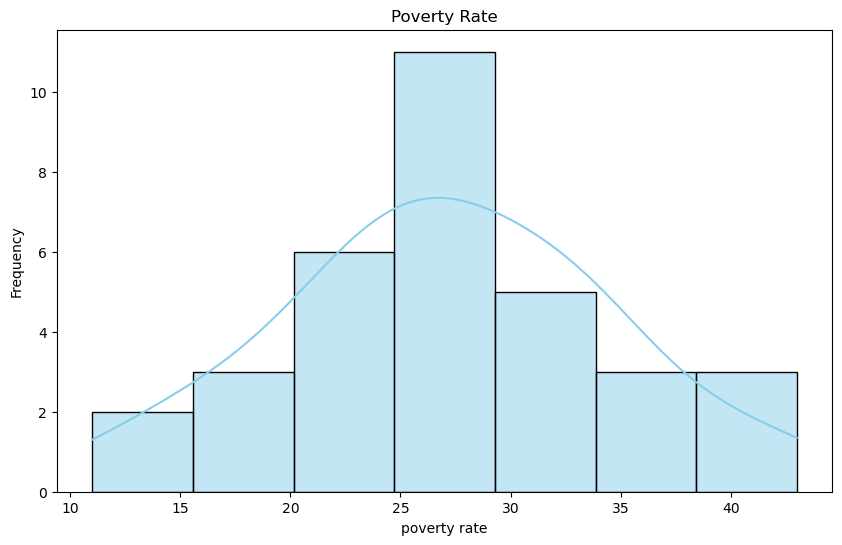

In [391]:
# Display the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(imputed_df['poverty_rate'], kde=True, color='skyblue')
plt.title('Poverty Rate')
plt.xlabel('poverty rate')
plt.ylabel('Frequency')
plt.show()

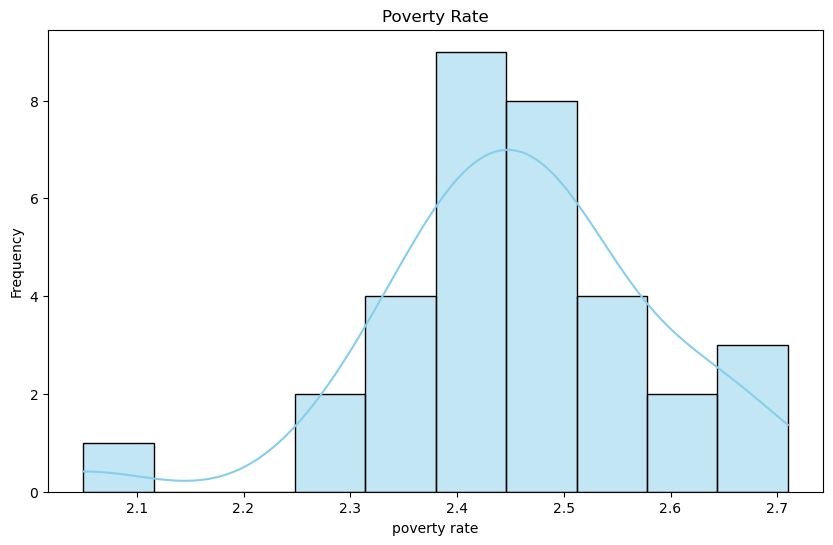

In [392]:
# Display the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(imputed_df['earnings_ratio_80_to_20'], kde=True, color='skyblue')
plt.title('Poverty Rate')
plt.xlabel('poverty rate')
plt.ylabel('Frequency')
plt.show()

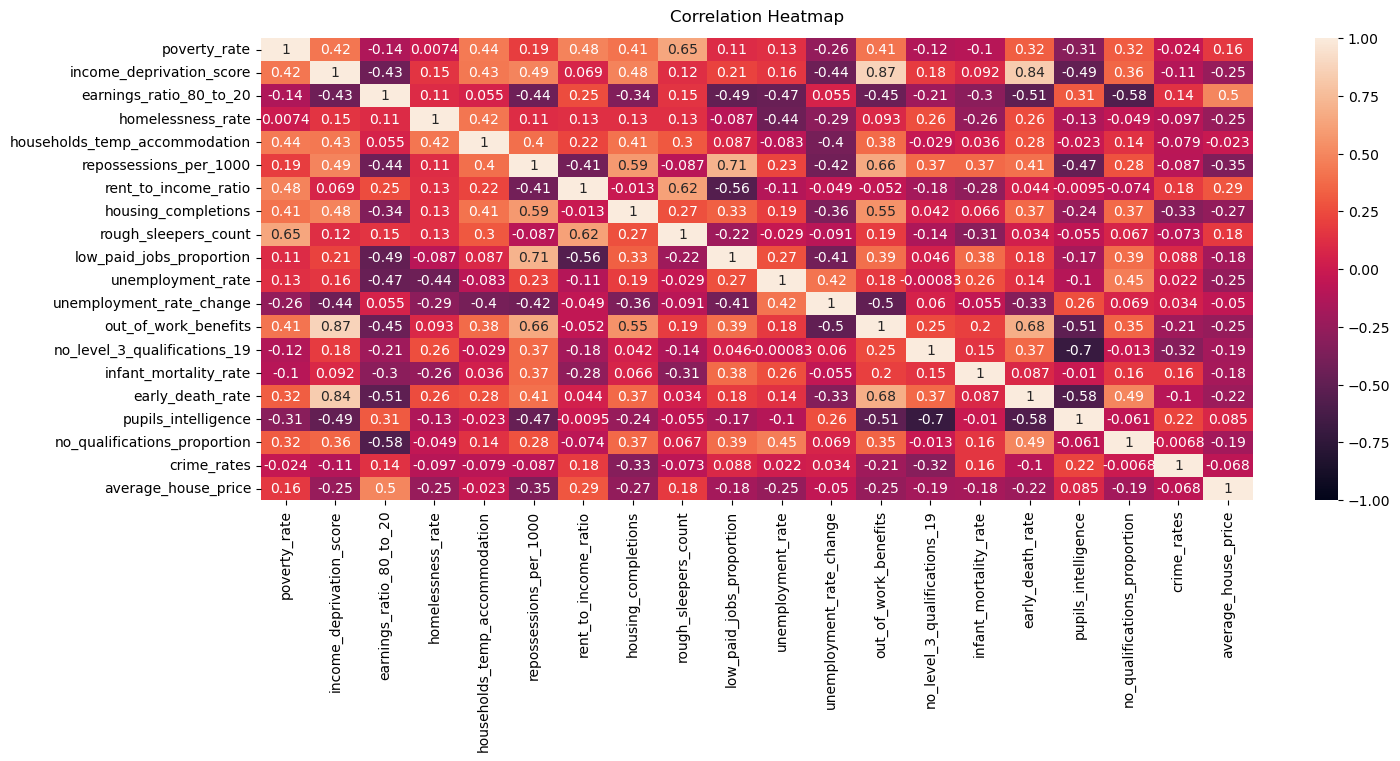

In [393]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(imputed_df.corr(), vmin=-1,vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [395]:
imputed_df

,poverty_rate,income_deprivation_score,earnings_ratio_80_to_20,homelessness_rate,households_temp_accommodation,repossessions_per_1000,rent_to_income_ratio,housing_completions,rough_sleepers_count,low_paid_jobs_proportion,unemployment_rate,unemployment_rate_change,out_of_work_benefits,no_level_3_qualifications_19,infant_mortality_rate,early_death_rate,pupils_intelligence,no_qualifications_proportion,crime_rates,average_house_price
area,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,29.000000,1.90,2.050000,0.66,16.08,4.11,36.5,613.0,139.0,24.600000,6.800000,1.900000,16.7,34.700000,4.600000,433.000000,66.0,12.000000,123.0,328226.0
Barnet,26.000000,0.77,2.410000,0.50,13.63,2.09,43.1,338.0,166.0,18.900000,5.400000,0.100000,11.7,21.700000,3.600000,258.000000,80.1,6.900000,91.0,583647.0
Bexley,26.000000,0.70,2.290000,0.48,5.68,2.76,33.2,284.0,92.0,16.700000,4.900000,2.200000,10.4,37.300000,6.000000,308.000000,69.4,7.400000,84.0,391250.0
Brent,32.000000,1.11,2.420000,0.52,13.97,3.45,43.1,1112.0,373.0,23.300000,5.700000,-1.300000,14.9,28.000000,4.100000,305.000000,68.0,7.600000,114.0,521609.0
Bromley,17.000000,0.58,2.570000,1.48,10.87,1.43,38.1,90.0,92.0,14.000000,5.000000,2.300000,9.3,32.600000,2.700000,250.000000,73.2,4.400000,88.0,505297.0
Camden,41.000000,1.18,2.480000,0.27,5.31,0.89,57.2,121.0,719.0,12.200000,4.900000,1.000000,13.7,25.200000,1.700000,324.000000,67.9,6.100000,109.0,858206.0
City of London,26.000000,1.01,2.410000,0.31,12.32,3.12,36.5,571.0,373.0,16.300000,5.300000,0.600000,14.7,33.300000,2.400000,314.000000,64.5,6.100000,29.0,808976.0
Croydon,34.000000,1.00,2.330000,1.01,20.41,3.51,44.1,774.0,563.0,19.800000,4.900000,-0.300000,13.3,23.200000,3.000000,300.000000,73.7,7.300000,109.0,394025.0
Ealing,33.000000,1.49,2.350000,0.70,23.49,3.53,37.3,240.0,219.0,22.800000,5.600000,-0.300000,16.4,34.800000,5.800000,297.000000,65.7,4.400000,105.0,533943.0


Strong Positive Correlations:

Child Poverty Rate and Income Deprivation Score: With a correlation of 0.82, areas with high child poverty rates also tend to have high income deprivation scores.

Child Poverty Rate and Out of Work Benefits: The correlation of 0.7 indicates that areas with more child poverty also have higher reliance on out of work benefits.

Income Deprivation Score and Out of Work Benefits: A correlation of 0.87 suggests a strong relationship between income deprivation and the need for out of work benefits.

Strong Negative Correlations:

No Qualifications Proportion and Pupils Intelligence: A correlation of -0.69 indicates that areas with higher proportions of individuals with no qualifications tend to have lower average scores in assessments of pupils' intelligence.

Moderate to Strong Correlations:

Early Death Rate and Child Poverty Rate: A correlation of 0.83 suggests that higher rates of child poverty are associated with higher early death rates in the area.

Early Death Rate and Income Deprivation Score: Similarly, a correlation of 0.83 indicates that areas with high income deprivation scores also have higher rates of early deaths.

Rough Sleepers Count and Poverty Rate: A correlation of 0.65 shows that areas with higher poverty rates tend to have more rough sleepers.

Interesting Observations:

Housing Completions and Repossessions per 1000: The positive correlation of 0.59 implies that areas with more housing completions also have higher rates of repossessions, which could suggest rapid housing development alongside financial instability for some residents.

Unemployment Rate and Unemployment Rate Change: Negative correlation of -0.29 indicates that areas with currently higher unemployment rates have seen a decline in unemployment over the last year (assuming 'change' is measured as a reduction).
Other Observations:

Some correlations are less intuitive or might seem counterintuitive, such as the low or negative correlations between measures of poverty/deprivation and some health or educational outcomes. This could suggest complex dynamics or the influence of mitigating factors like government programs or community initiatives.

In [398]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(imputed_df)

# Assuming imputed_df is already loaded with the correct columns and imputed data
# Normalize all features (standardizing)
features_to_normalize = imputed_df.columns  # Now we directly use all columns as 'area' is not one of them
imputed_df[features_to_normalize] = (imputed_df[features_to_normalize] - imputed_df[features_to_normalize].mean()) / imputed_df[features_to_normalize].std()

imputed_df

,poverty_rate,income_deprivation_score,earnings_ratio_80_to_20,homelessness_rate,households_temp_accommodation,repossessions_per_1000,rent_to_income_ratio,housing_completions,rough_sleepers_count,low_paid_jobs_proportion,...,unemployment_rate_change,out_of_work_benefits,no_level_3_qualifications_19,infant_mortality_rate,early_death_rate,pupils_intelligence,no_qualifications_proportion,crime_rates,average_house_price,suitability_score
area,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,0.248363,2.008180,-3.171222,-0.624192,-0.008071,1.738977,-0.917040,0.945235,-0.507725,2.081760,...,0.940569,1.526306,1.121513,1.103584,2.481089,-0.912695,3.502531,0.768046,-1.281932,-2.567378
Barnet,-0.150360,-0.691353,-0.363213,-1.010561,-0.261979,-0.253806,-0.310875,-0.056284,-0.431847,0.699228,...,-0.423218,-0.245971,-1.455043,0.239910,-1.177198,1.625722,0.620478,-0.601982,0.159512,0.779062
Bexley,-0.150360,-0.858580,-1.299216,-1.058857,-1.085884,0.407166,-1.220122,-0.252945,-0.639808,0.165620,...,1.167867,-0.706763,1.636824,2.312728,-0.131973,-0.300595,0.903032,-0.901675,-0.926262,-0.023767
Brent,0.647087,0.120896,-0.285213,-0.962265,-0.226743,1.087870,-0.310875,2.762535,0.149882,1.766446,...,-1.483941,0.888287,-0.206405,0.671747,-0.194686,-0.552636,1.016054,0.382725,-0.190593,-0.469930
Bromley,-1.346531,-1.145256,0.884791,1.355952,-0.548014,-0.904914,-0.770091,-0.959471,-0.639808,-0.489264,...,1.243633,-1.096663,0.705300,-0.537397,-1.344434,0.383518,-0.792293,-0.730422,-0.282649,1.169420
Camden,1.843258,0.288124,0.182788,-1.565967,-1.124229,-1.437638,0.984113,-0.846573,1.122241,-0.925853,...,0.258676,0.462940,-0.761355,-1.401072,0.202499,-0.570639,0.168391,0.168659,1.708961,-0.110504
City of London,-0.150360,-0.118000,-0.363213,-1.469375,-0.397742,0.762316,-0.917040,0.792275,0.149882,0.068600,...,-0.044388,0.817396,0.844037,-0.796500,-0.006546,-1.182740,0.168391,-3.256410,1.431136,0.623619
Croydon,0.912903,-0.141890,-0.987215,0.220992,0.440672,1.147061,-0.219032,1.531578,0.683836,0.917523,...,-0.726281,0.321158,-1.157749,-0.278295,-0.299209,0.473532,0.846521,0.168659,-0.910602,-0.444149
Ealing,0.779995,1.028704,-0.831215,-0.527599,0.759870,1.166792,-0.843565,-0.413188,-0.282902,1.645171,...,-0.726281,1.419970,1.141332,2.139993,-0.361922,-0.966704,-0.792293,-0.002595,-0.120987,-1.108207


In [406]:
# Calculate the suitability score using weighted sums
imputed_df['suitability_score'] = (
    -0.1 * imputed_df['poverty_rate'] +
    -0.1 * imputed_df['unemployment_rate'] +
    -0.05 * imputed_df['repossessions_per_1000'] +
    -0.05 * imputed_df['rough_sleepers_count'] +
    -0.01 * imputed_df['crime_rates'] +
    -0.05 * imputed_df['no_qualifications_proportion'] +
    -0.05 * imputed_df['early_death_rate'] +
    -0.05 * imputed_df['infant_mortality_rate'] +
    0.05 * imputed_df['earnings_ratio_80_to_20'] +
    0.1 * imputed_df['pupils_intelligence'] +
    0.05 * imputed_df['housing_completions'] +
    -0.1 * imputed_df['average_house_price'] +
    -0.05 * imputed_df['income_deprivation_score'] +
    -0.01 * imputed_df['homelessness_rate'] +
    -0.05 * imputed_df['households_temp_accommodation'] +
    -0.05 * imputed_df['rent_to_income_ratio']
)



# Normalize the suitability score to a 0-100 scale for better readability
imputed_df['suitability_score'] = (imputed_df['suitability_score'] - imputed_df['suitability_score'].min()) / (imputed_df['suitability_score'].max() - imputed_df['suitability_score'].min()) * 100

# View the DataFrame with the new suitability scores
imputed_df[['suitability_score']]

,suitability_score
area,
Barking and Dagenham,0.000000
Barnet,59.575753
Bexley,49.919881
Brent,36.584042
Bromley,77.464486
Camden,26.401646
City of London,37.816796
Croydon,45.653693
Ealing,21.573443


In [345]:
# K-means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
imputed_df['Cluster'] = clusters

C:\Users\Jamie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


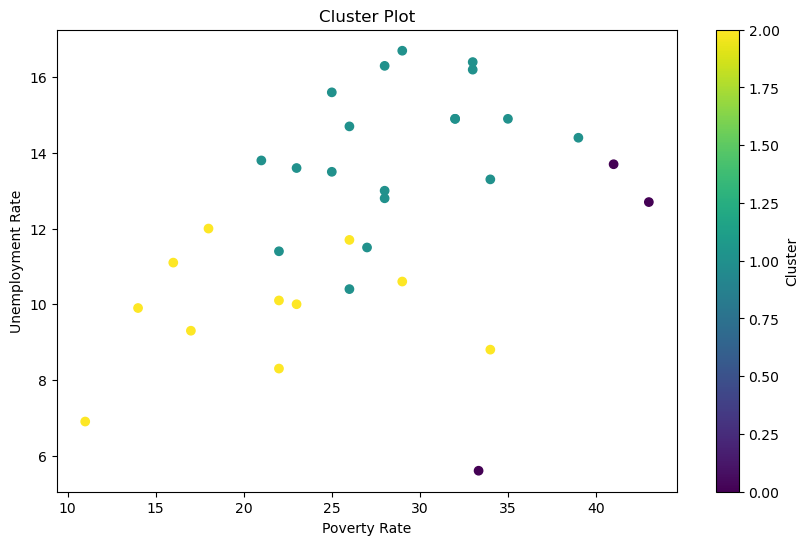

In [346]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(imputed_df['poverty_rate'], imputed_df['out_of_work_benefits'], c=imputed_df['Cluster'], cmap='viridis')
plt.xlabel('Poverty Rate')
plt.ylabel('Unemployment Rate')
plt.title('Cluster Plot')
plt.colorbar(label='Cluster')
plt.show()